In [1]:


import pandas as pd
from sklearn import tree
import numpy as np



In [4]:
df=pd.read_csv('/home/exam/Downloads/zoo.csv')

In [5]:
df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
classes=['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [8]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('class_type', axis=1).drop('animal_name', axis=1), 
    df['class_type'], 
    test_size=0.33, random_state=42
)


In [37]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
47,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
53,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0


[Text(1116.0, 1009.5428571428572, 'milk <= 0.5\ngini = 0.765\nsamples = 67\nvalue = [24, 17, 3, 11, 2, 3, 7]\nclass = Mammal'),
 Text(976.5, 854.2285714285715, 'feathers <= 0.5\ngini = 0.74\nsamples = 43\nvalue = [0, 17, 3, 11, 2, 3, 7]\nclass = Bird'),
 Text(837.0, 698.9142857142858, 'fins <= 0.5\ngini = 0.716\nsamples = 26\nvalue = [0, 0, 3, 11, 2, 3, 7]\nclass = Fish'),
 Text(697.5, 543.6, 'backbone <= 0.5\ngini = 0.684\nsamples = 15\nvalue = [0, 0, 3, 0, 2, 3, 7]\nclass = Invertebrate'),
 Text(418.5, 388.28571428571433, 'predator <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 3, 7]\nclass = Invertebrate'),
 Text(279.0, 232.97142857142865, 'legs <= 3.0\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 3, 2]\nclass = Bug'),
 Text(139.5, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]\nclass = Invertebrate'),
 Text(418.5, 77.65714285714284, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 3, 0]\nclass = Bug'),
 Text(558.0, 232.97142857142865, '

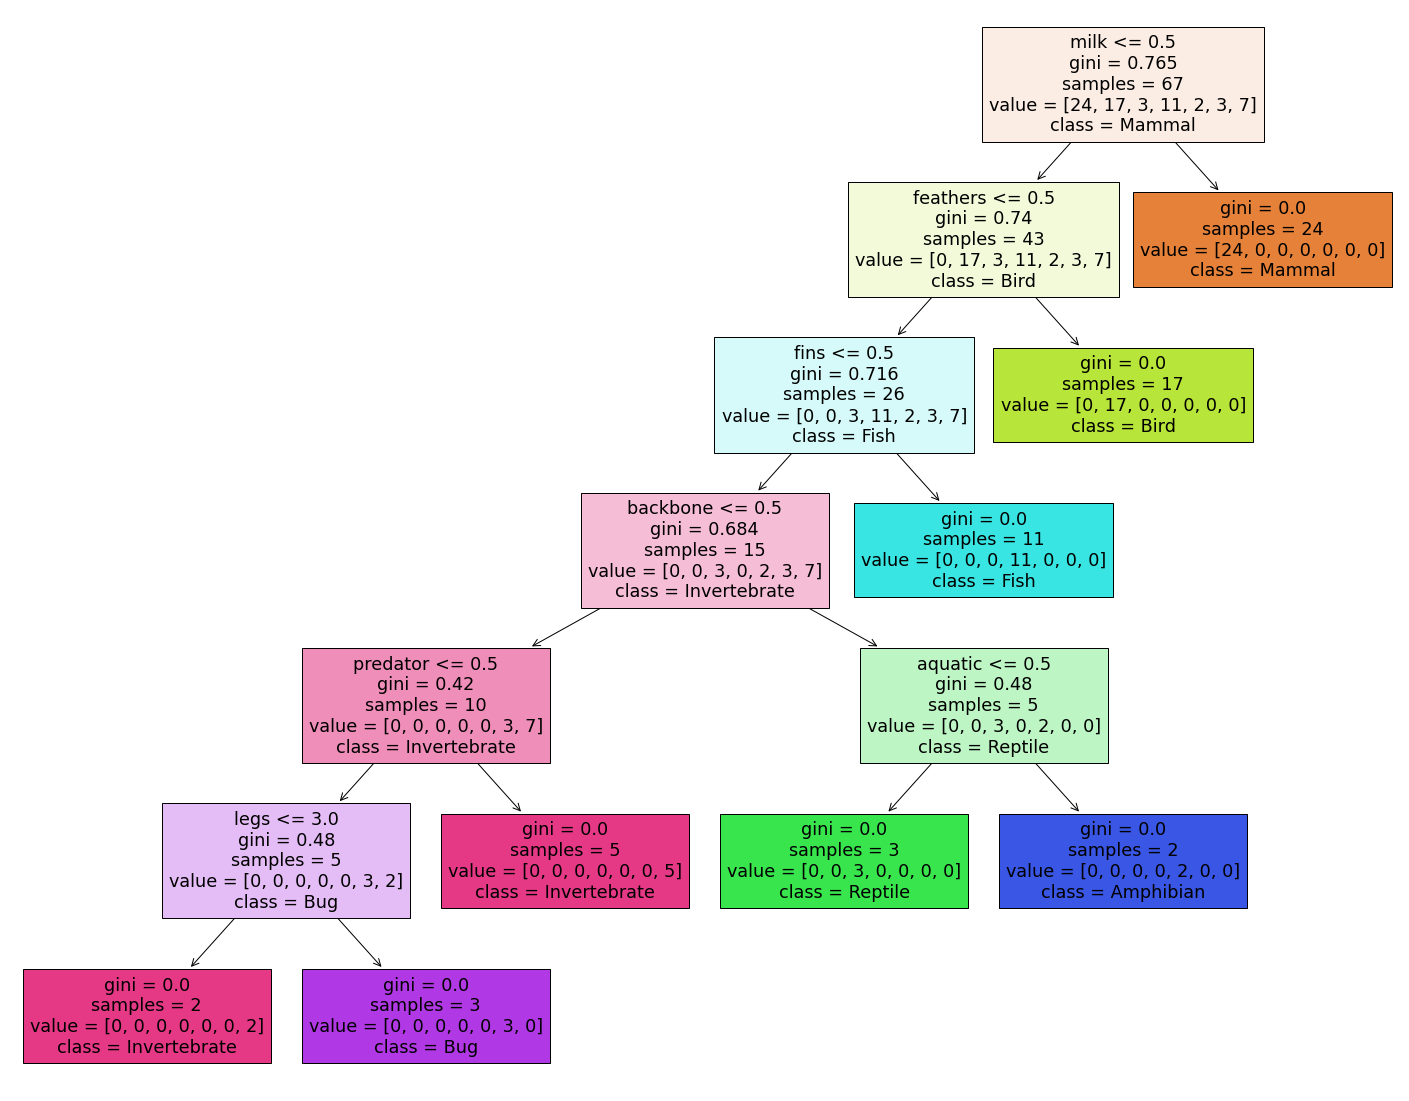

In [38]:
import matplotlib.pyplot as plt


model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


fig=plt.figure(figsize=(25,20))
tree.plot_tree(model,feature_names=X_train.columns,class_names=classes,filled=True)

In [27]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
80,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1
63,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
38,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [28]:
pred = model.predict(X_test)


In [29]:
pred[:10]

array([3, 1, 1, 7, 4, 2, 6, 1, 6, 3])

In [30]:
y_test

80     3
75     1
63     1
15     7
38     4
11     2
40     6
45     1
39     6
62     3
84     1
4      1
47     1
27     1
76     3
17     1
87     2
33     2
9      1
93     1
72     7
66     1
100    2
68     1
26     5
69     1
78     2
2      4
77     7
81     7
20     2
32     1
51     6
0      1
Name: class_type, dtype: int64

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(y_test, pred))

[[15  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  1]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  1  3]]


In [33]:
print("Actual\t\t\t\tPrediction")
y_test = list(y_test)

for i in range(len(y_test[:25])):
    print(f"{classes[y_test[i]-1]}\t\t\t\t{classes[pred[i]-1]}")

Actual				Prediction
Reptile				Reptile
Mammal				Mammal
Mammal				Mammal
Invertebrate				Invertebrate
Fish				Fish
Bird				Bird
Bug				Bug
Mammal				Mammal
Bug				Bug
Reptile				Reptile
Mammal				Mammal
Mammal				Mammal
Mammal				Mammal
Mammal				Mammal
Reptile				Invertebrate
Mammal				Mammal
Bird				Bird
Bird				Bird
Mammal				Mammal
Mammal				Mammal
Invertebrate				Bug
Mammal				Mammal
Bird				Bird
Mammal				Mammal
Amphibian				Amphibian
